In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import scipy.stats as stats

# Seats lost by the Conservatives

In [60]:
SeatsLost = pd.read_csv('SeatsLostByTheCons.csv')
SeatsLost

,Constituency,Result2024,Majority,TotalVotes,Margin
0,Aldershot,Lab,5683,48544,0.117069
1,Altrincham and Sale West,Lab,4174,51452,0.081124
2,Amber Valley,Lab,3554,42531,0.083563
3,Ashfield,Ref,5509,39881,0.138136
4,Ashford,Lab,1779,46975,0.037871
...,...,...,...,...,...
244,Monmouthshire,Lab,3338,50844,0.065652
245,Montgomeryshire and Glynd?r,Lab,3815,43259,0.088190
246,Vale of Glamorgan,Lab,4216,45826,0.092000
247,Wrexham,Lab,5948,45826,0.129795


In [61]:
#for x in SeatsLost['Constituency']:
    #print(x)

In [62]:
SeatsLost['Constituency'] = SeatsLost['Constituency'].replace({'Montgomeryshire and Glynd?r': 'Montgomeryshire and Glyndwr'})
SeatsLost

,Constituency,Result2024,Majority,TotalVotes,Margin
0,Aldershot,Lab,5683,48544,0.117069
1,Altrincham and Sale West,Lab,4174,51452,0.081124
2,Amber Valley,Lab,3554,42531,0.083563
3,Ashfield,Ref,5509,39881,0.138136
4,Ashford,Lab,1779,46975,0.037871
...,...,...,...,...,...
244,Monmouthshire,Lab,3338,50844,0.065652
245,Montgomeryshire and Glyndwr,Lab,3815,43259,0.088190
246,Vale of Glamorgan,Lab,4216,45826,0.092000
247,Wrexham,Lab,5948,45826,0.129795


# British Election Study

In [63]:
BES = pd.read_csv('BES2024Long.csv')
BES

,id,wave,weight,generalElectionVote,new_pcon,age,pcon,p_edlevel
0,1,1,0.619887,Labour,Chester South and Eddisbury,58.0,Weaver Vale,NaN
1,1,2,0.611112,Labour,Chester South and Eddisbury,58.0,Weaver Vale,NaN
2,1,4,0.593430,Labour,Chester South and Eddisbury,59.0,Weaver Vale,A-level
3,1,5,0.621257,Labour,Chester South and Eddisbury,59.0,Weaver Vale,NaN
4,1,6,0.764948,Labour,Chester South and Eddisbury,59.0,Weaver Vale,NaN
...,...,...,...,...,...,...,...,...
802498,115586,26,2.867724,Conservative,Bradford East,47.0,Bradford East,No qualifications
802499,115587,26,3.014036,Liberal Democrat,Gower,36.0,Gower,GCSE
802500,115588,26,2.176923,Labour,South Ribble,32.0,South Ribble,Undergraduate
802501,115589,26,0.800532,Labour,"Moray West, Nairn and Strathspey",33.0,Moray,Undergraduate


In [64]:
#for x in BES['new_pcon'].unique():
    #print(x)

In [65]:
def cleanCon(column):
    
    column = column.str.replace(' ', '_')
    column = column.str.replace(',', '')

    return column

In [66]:
SeatsLost['Constituency'] = cleanCon(SeatsLost['Constituency'])
BES['new_pcon'] = cleanCon(BES['new_pcon'])

In [67]:
filteredBES = BES[BES['new_pcon'].isin(SeatsLost['Constituency'])]
filteredBES = filteredBES.dropna()
filteredBES = filteredBES.reset_index()
filteredBES = filteredBES.drop(columns=['pcon'])
filteredBES = filteredBES.drop(columns=['index'])

filteredBES.shape

(261010, 7)

In [68]:
filteredBES

,id,wave,weight,generalElectionVote,new_pcon,age,p_edlevel
0,2,1,0.848408,Conservative,Crawley,62.0,Undergraduate
1,2,3,0.690841,Conservative,Crawley,62.0,Undergraduate
2,2,4,0.992115,Conservative,Crawley,63.0,Undergraduate
3,2,5,0.923585,Conservative,Crawley,63.0,Undergraduate
4,2,6,0.462201,Conservative,Crawley,63.0,Undergraduate
...,...,...,...,...,...,...,...
261005,115574,26,3.701448,Don't know,Dartford,20.0,GCSE
261006,115578,26,2.255338,Don't know,Tipton_and_Wednesbury,19.0,GCSE
261007,115581,26,1.569519,Green Party,North_Devon,34.0,GCSE
261008,115582,26,1.177346,Labour,Ashfield,32.0,GCSE


In [69]:
filteredBES['p_edlevel'].unique()

array(['Undergraduate', 'A-level', 'No qualifications', 'Postgrad',
       'GCSE', 'Below GCSE'], dtype=object)

In [70]:
edlevel_order = ['No qualifications', 'Below GCSE', 'GCSE', 'A-level', 'Undergraduate', 'Postgrad']
oe = OrdinalEncoder(categories=[edlevel_order])

ed_level = filteredBES['p_edlevel']
ed_level = pd.DataFrame(ed_level)

ed_level = oe.fit_transform(ed_level)
ed_level = pd.DataFrame(ed_level)

In [71]:
filteredBES = pd.concat([filteredBES, ed_level], axis = 1)
filteredBES = filteredBES.rename(columns={0: 'p_edlevel_e'})
filteredBES

,id,wave,weight,generalElectionVote,new_pcon,age,p_edlevel,p_edlevel_e
0,2,1,0.848408,Conservative,Crawley,62.0,Undergraduate,4.0
1,2,3,0.690841,Conservative,Crawley,62.0,Undergraduate,4.0
2,2,4,0.992115,Conservative,Crawley,63.0,Undergraduate,4.0
3,2,5,0.923585,Conservative,Crawley,63.0,Undergraduate,4.0
4,2,6,0.462201,Conservative,Crawley,63.0,Undergraduate,4.0
...,...,...,...,...,...,...,...,...
261005,115574,26,3.701448,Don't know,Dartford,20.0,GCSE,2.0
261006,115578,26,2.255338,Don't know,Tipton_and_Wednesbury,19.0,GCSE,2.0
261007,115581,26,1.569519,Green Party,North_Devon,34.0,GCSE,2.0
261008,115582,26,1.177346,Labour,Ashfield,32.0,GCSE,2.0


In [72]:
filteredBES = pd.get_dummies(filteredBES, columns = ['generalElectionVote', 'new_pcon'], dtype=float)
filteredBES

,id,wave,weight,age,p_edlevel,p_edlevel_e,generalElectionVote_An independent candidate,generalElectionVote_Brexit Party/Reform UK,generalElectionVote_British National Party (BNP),generalElectionVote_Change UK- The Independent Group,...,new_pcon_Wokingham,new_pcon_Wolverhampton_North_East,new_pcon_Wolverhampton_West,new_pcon_Worcester,new_pcon_Worthing_West,new_pcon_Wrexham,new_pcon_Wycombe,new_pcon_Yeovil,new_pcon_Ynys_Mon,new_pcon_York_Outer
0,2,1,0.848408,62.0,Undergraduate,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,3,0.690841,62.0,Undergraduate,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4,0.992115,63.0,Undergraduate,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,5,0.923585,63.0,Undergraduate,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,6,0.462201,63.0,Undergraduate,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261005,115574,26,3.701448,20.0,GCSE,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261006,115578,26,2.255338,19.0,GCSE,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261007,115581,26,1.569519,34.0,GCSE,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261008,115582,26,1.177346,32.0,GCSE,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
MRBES = filteredBES.drop(columns=['p_edlevel'])
MRBES

,id,wave,weight,age,p_edlevel_e,generalElectionVote_An independent candidate,generalElectionVote_Brexit Party/Reform UK,generalElectionVote_British National Party (BNP),generalElectionVote_Change UK- The Independent Group,generalElectionVote_Conservative,...,new_pcon_Wokingham,new_pcon_Wolverhampton_North_East,new_pcon_Wolverhampton_West,new_pcon_Worcester,new_pcon_Worthing_West,new_pcon_Wrexham,new_pcon_Wycombe,new_pcon_Yeovil,new_pcon_Ynys_Mon,new_pcon_York_Outer
0,2,1,0.848408,62.0,4.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,3,0.690841,62.0,4.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4,0.992115,63.0,4.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,5,0.923585,63.0,4.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,6,0.462201,63.0,4.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261005,115574,26,3.701448,20.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261006,115578,26,2.255338,19.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261007,115581,26,1.569519,34.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261008,115582,26,1.177346,32.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
correlation_pearson = MRBES['p_edlevel_e'].corr(MRBES['generalElectionVote_Conservative'])
print(correlation_pearson)

-0.0649379045575226


In [75]:
def w_mean(values, w):
    return np.sum(values * w) / np.sum(w)

def w_covaraince(x, y, w):
    mean_x = w_mean(x, w)
    mean_y = w_mean(y, w)
    return np.sum(w * (x - mean_x) * (y - mean_y)) / np.sum(w)

def w_correlation(x, y, w):
    cov_xy = w_covaraince(x, y, w)
    var_x = w_covaraince(x, x, w)
    var_y = w_covaraince(y, y, w)
    return cov_xy / np.sqrt(var_x * var_y)

In [76]:
x = MRBES['p_edlevel_e'].values
y = MRBES['generalElectionVote_Conservative'].values
w = MRBES['weight'].values

w_corr = w_correlation(x, y, w)
print(w_corr)

-0.0390831933966805


In [77]:
waves = MRBES['wave'].unique()
w_corrPerWave = []
wavesList = []
data = MRBES

for wave in waves:
    TempBES = MRBES[MRBES['wave'] == wave]
    x = TempBES['p_edlevel_e']
    y = TempBES['generalElectionVote_Conservative']
    w = TempBES['weight']
    w_corr = w_correlation(x, y, w)
    w_corrPerWave.append(w_corr)
    wavesList.append(wave)

In [78]:
e_w_corrPerWave = pd.DataFrame(w_corrPerWave)
e_w_corrPerWave = e_w_corrPerWave.rename(columns={0: 'Correlation'})
wavesList = pd.DataFrame(wavesList)
wavesList = wavesList.rename(columns={0: 'Wave'})


education_corr_over_waves = pd.concat([wavesList, e_w_corrPerWave], axis=1)
education_corr_over_waves.head()

,Wave,Correlation
0,1,0.043876
1,3,0.028006
2,4,0.038495
3,5,0.026253
4,6,0.022832


In [79]:
education_corr_over_waves = education_corr_over_waves.sort_values(by=['Wave'], ascending=True)
education_corr_over_waves = education_corr_over_waves.reset_index()
education_corr_over_waves = education_corr_over_waves.drop(columns=['index'])
education_corr_over_waves

,Wave,Correlation
0,1,0.043876
1,2,0.048516
2,3,0.028006
3,4,0.038495
4,5,0.026253
5,6,0.022832
6,7,0.059840
7,8,0.059389
8,9,0.031124
9,10,-0.001296


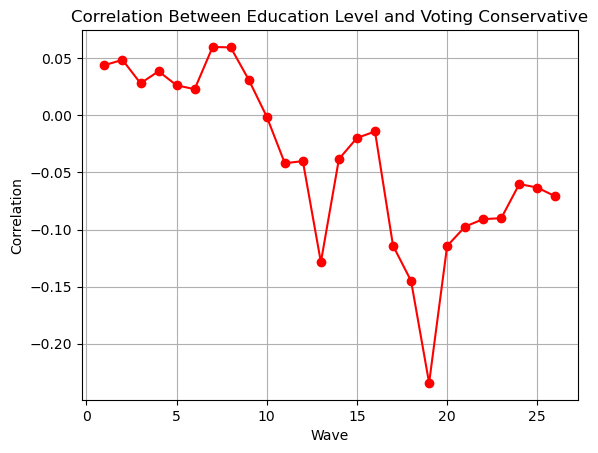

In [80]:
plt.plot(education_corr_over_waves['Wave'], education_corr_over_waves['Correlation'], marker='o', linestyle='-', color='r')

plt.title('Correlation Between Education Level and Voting Conservative')
plt.xlabel('Wave')
plt.ylabel('Correlation')

plt.grid(True)
plt.show()

In [81]:
slope, intercept, r_value, p_value, std_err = stats.linregress(education_corr_over_waves['Wave'], education_corr_over_waves['Correlation'])
print(slope)

-0.007219249645677256


In [82]:
x = MRBES['age'].values
y = MRBES['generalElectionVote_Conservative'].values
w = MRBES['weight'].values

w_corr = w_correlation(x, y, w)
print(w_corr)

0.19458811829690292


In [83]:
waves = MRBES['wave'].unique()
w_corrPerWave = []
wavesList = []
data = MRBES

for wave in waves:
    TempBES = MRBES[MRBES['wave'] == wave]
    x = TempBES['age']
    y = TempBES['generalElectionVote_Conservative']
    w = TempBES['weight']
    w_corr = w_correlation(x, y, w)
    w_corrPerWave.append(w_corr)
    wavesList.append(wave)

In [84]:
a_w_corrPerWave = pd.DataFrame(w_corrPerWave)
a_w_corrPerWave = a_w_corrPerWave.rename(columns={0: 'Correlation'})
wavesList = pd.DataFrame(wavesList)
wavesList = wavesList.rename(columns={0: 'Wave'})


age_corr_over_waves = pd.concat([wavesList, a_w_corrPerWave], axis=1)

In [85]:
age_corr_over_waves = age_corr_over_waves.sort_values(by=['Wave'], ascending=True)
age_corr_over_waves = age_corr_over_waves.reset_index()
age_corr_over_waves = age_corr_over_waves.drop(columns=['index'])

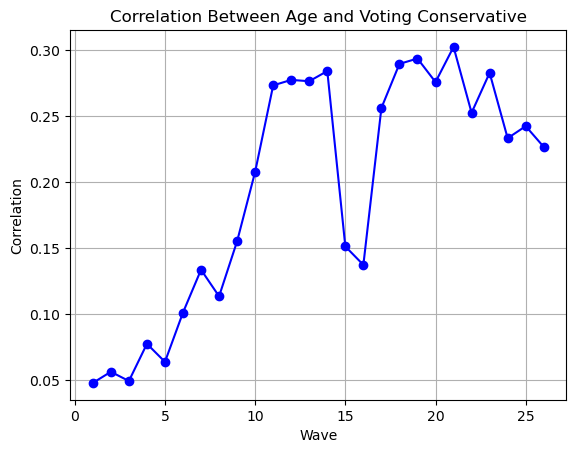

In [86]:
plt.plot(age_corr_over_waves['Wave'], age_corr_over_waves['Correlation'], marker='o', linestyle='-', color='b')

plt.title('Correlation Between Age and Voting Conservative')
plt.xlabel('Wave')
plt.ylabel('Correlation')

plt.grid(True)
plt.show()

In [87]:
slope, intercept, r_value, p_value, std_err = stats.linregress(age_corr_over_waves['Wave'], age_corr_over_waves['Correlation'])
print(slope)

0.009247023808236558
